In [ ]:
from google.colab import drive
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [ ]:
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [ ]:
sys.path.append('/content/gdrive/My Drive/')
import fp_utilities as fp_util

In [ ]:
import importlib
importlib.reload(fp_util)

<module 'fp_utilities' from '/content/gdrive/My Drive/fp_utilities.py'>

In [ ]:
atk_strengths = np.arange(0.0001, 0.001, 0.0001).tolist() + np.arange(0.001, 0.01, 0.001).tolist() + [0.1, 0.4, 0.7, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score
marra_accuracies = []
yu_accuracies = []

In [ ]:
for atk_strength in atk_strengths:
  marra_preds = fp_util.get_predictions('Marra', attack_mode="gaussian", attack_strength=atk_strength)
  marra_accuracies.append(accuracy_score(fp_util.ground_truth, marra_preds))
  yu_preds = fp_util.get_predictions('Yu', attack_mode="gaussian", attack_strength=atk_strength)
  yu_accuracies.append(accuracy_score(fp_util.ground_truth, yu_preds))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
np.save('marra_accuracies_gaussian.npy', marra_accuracies)
np.save('yu_accuracies_gaussian.npy', yu_accuracies)

In [ ]:
abs_atk_strengths = [relative_strength*fp_util.avg_l2_norm_imgs for relative_strength in atk_strengths]

In [ ]:
abs_atk_strengths

[0.0009203744140625001,
 0.0018407488281250001,
 0.0027611232421875004,
 0.0036814976562500002,
 0.0046018720703125005,
 0.005522246484375001,
 0.006442620898437501,
 0.0073629953125000005,
 0.008283369726562502,
 0.009203744140625001,
 0.018407488281250002,
 0.027611232421875,
 0.036814976562500004,
 0.046018720703125,
 0.05522246484375,
 0.064426208984375,
 0.07362995312500001,
 0.082833697265625,
 0.9203744140625001,
 3.6814976562500004,
 6.442620898437499,
 9.203744140625]

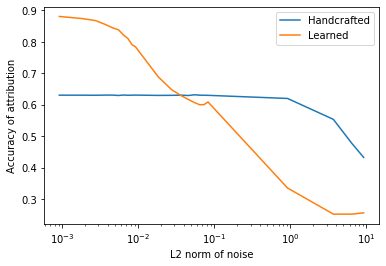

In [ ]:
import matplotlib.pyplot as plt
plt.plot(abs_atk_strengths, marra_accuracies, label="Handcrafted")
plt.plot(abs_atk_strengths, yu_accuracies, label="Learned")
plt.xscale('log')
plt.xlabel('L2 norm of noise')
plt.ylabel('Accuracy of attribution')
plt.legend()
plt.show()

In [ ]:
for gan_num in range(4):
  test_imgs = fp_util.load_test_images(gan_num)
  sum_l2_norms = np.sum([np.linalg.norm(img) for img in test_imgs])
  print(sum_l2_norms/4000)


2.2172275390625
2.36839892578125
2.1285166015625
2.48960107421875
